# Multi Class Problems:

 

## Problem: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total. 

With the array there are two ways we can load them in: First, we can load them into a $609\times 176 \times 176$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that can not see the 2D structure, we may want to flatten the images to a $609\times 30976$ array (note that $30976 = 176 \times 176$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
labels = pd.read_csv("labels.csv")
display(labels)
y = labels.CDR
y=(y*2).astype(int) 

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


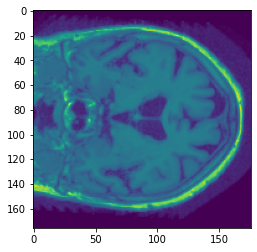

In [3]:
data = np.zeros([609, 30976])
for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
# Now we can use the file name to read the data
plt.imshow(data[22].reshape(176,176))

(487, 30976) (487,)


0

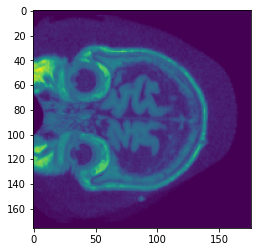

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
plt.imshow(X_train[22].reshape(176,176))
y_train[22]

### Question1:

Perform Logistic Regression on the above Oasis 1 dataset.   Find the score and the Confusion Matrix

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=30976)
clf.fit(X_train[0:30976].reshape(-1,(176*176)),y_train[0:30976])
print("Logistic Regression Score: %.3f"%clf.score(X_test.reshape(-1,(176*176)),y_test))

Logistic Regression Score: 0.484


In [6]:
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test.reshape(-1,176*176))
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[49, 13,  4,  0],
       [25,  8,  2,  0],
       [11,  7,  2,  0],
       [ 1,  0,  0,  0]])

####  Each image contains 176×176=30976 features. Now, we make each sampe smaller size by 1/8.  

In [7]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data
y_train_dwn = np.array(y_train)

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


dwn = np.zeros([609, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
    dwn[i,:] = img[::DS]            # Downsample the image

In [8]:
dwn.shape

(609, 3872)

Based on the code above, downsample the test data in the same way. 

In [ ]:
N_train = y_test.shape[0]  # The length of the training data
y_test_dwn = np.array(y_test)

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


dwn = np.zeros([609, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
    dwn[i,:] = img[::DS]            # Downsample the image

# Question2:
 
Perform Logistic Regression on the down sampled Oasis 1 dataset.   Find the score and the Confusion Matrix

In [16]:
X_train_dwn, X_test_dwn, y_train_dwn, y_test_dwn = train_test_split(dwn, y, test_size=0.2, random_state=0)
clf_dwn = LogisticRegression(solver='lbfgs', max_iter=3872)
clf_dwn.fit(X_train_dwn[0:3872].reshape(-1,3872),y_train_dwn[0:3872])
print("Logistic Regression Score: %.3f"%clf_dwn.score(X_test_dwn.reshape(-1,3872),y_test_dwn))

Logistic Regression Score: 0.525


In [12]:
y_predict_dwn = clf_dwn.predict(X_test_dwn.reshape(-1,3872))
conf_mx_dwn = confusion_matrix(y_test_dwn, y_predict_dwn)
conf_mx_dwn

array([[54, 11,  1,  0],
       [26,  8,  1,  0],
       [16,  2,  2,  0],
       [ 1,  0,  0,  0]])